# Fire Up OpenCV, Numpy, Matplotlib, Scikit-learn

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing

# Load Image

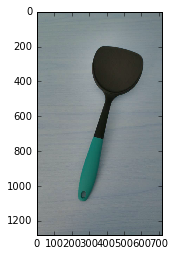

In [2]:
img = cv2.imread('/home/chentao/Pictures/1.jpg')
flat_img = img.reshape(-1,3).astype(float)
flat_img = preprocessing.scale(flat_img)
plt.imshow(img)
plt.show()

# KMeans

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(flat_img)
y = kmeans.predict(flat_img)

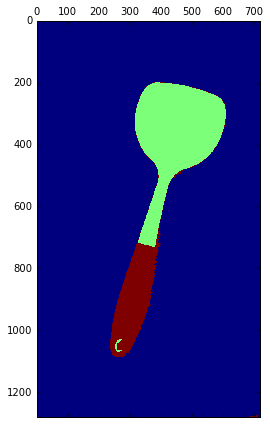

In [4]:
plt.matshow(y.reshape(img.shape[:2]))
plt.show()

# MeanShift

In [5]:
#slow
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(flat_img, quantile=0.2, n_samples=7000)
mshift = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
mshift.fit(flat_img)
y = mshift.labels_

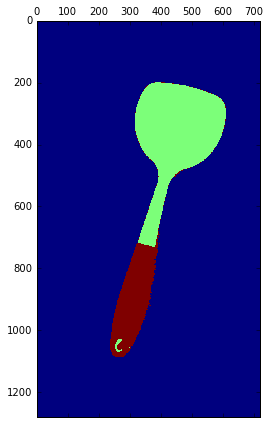

In [6]:
plt.matshow(y.reshape(img.shape[:2]))
plt.show()

# GMM

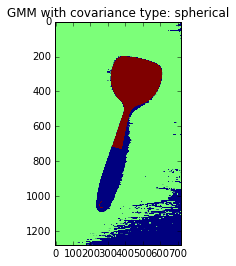

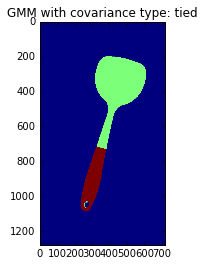

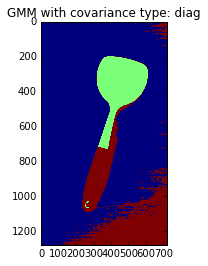

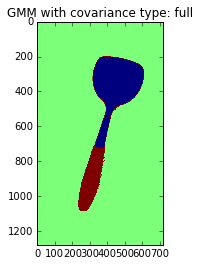

In [8]:
from sklearn.mixture import GMM
cov_types = ['spherical','tied','diag','full']
for i, cov in enumerate(cov_types):
    gmm = GMM(n_components = 3, covariance_type = cov)
    gmm.fit(flat_img)
    y = gmm.predict(flat_img)
    plt.title("GMM with covariance type: {:s}".format(cov))
    plt.imshow(y.reshape(img.shape[:2]))
    plt.show()

# VBGMM

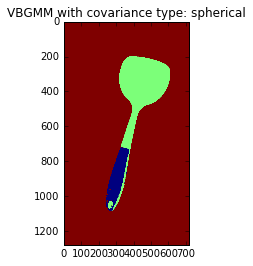

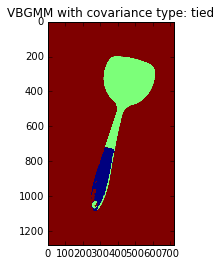

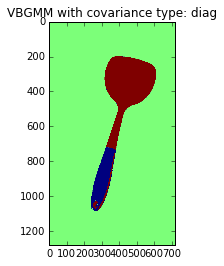

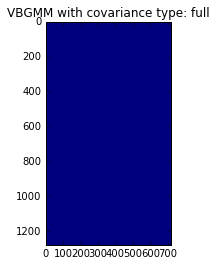

In [9]:
from sklearn.mixture import VBGMM
cov_types = ['spherical','tied','diag','full']
for i, cov in enumerate(cov_types):
    gmm = VBGMM(n_components = 3, covariance_type = cov)
    gmm.fit(flat_img)
    y = gmm.predict(flat_img)
    plt.title("VBGMM with covariance type: {:s}".format(cov))
    plt.imshow(y.reshape(img.shape[:2]))
    plt.show()

# DPGMM

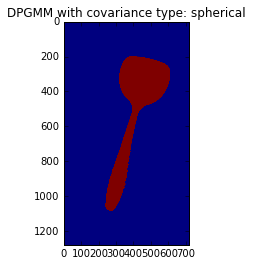

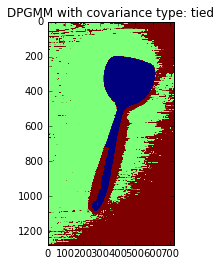

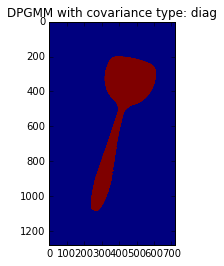

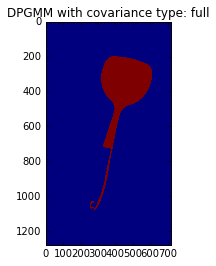

In [10]:
from sklearn.mixture import DPGMM
cov_types = ['spherical','tied','diag','full']
for i, cov in enumerate(cov_types):
    gmm = DPGMM(n_components = 3, covariance_type = cov)
    gmm.fit(flat_img)
    y = gmm.predict(flat_img)
    plt.title("DPGMM with covariance type: {:s}".format(cov))
    plt.imshow(y.reshape(img.shape[:2]))
    plt.show()

# Birch

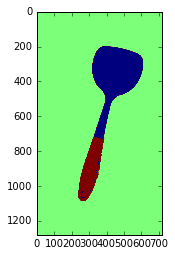

In [11]:
# slow
from sklearn.cluster import Birch
brc = Birch(branching_factor=50, n_clusters=3, threshold=0.8,compute_labels=True)
brc.fit(flat_img)
y = brc.labels_
plt.imshow(y.reshape(img.shape[:2]))
plt.show()